In [2]:
from IPython.display import Image
import ee, folium
#import folium.colormap as cm
import branca
import branca.colormap as cm
ee.Initialize()
print (folium.__file__)
print (folium.__version__)
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

import cartoee as cee
import cartopy.crs as ccrs

/home/manmeet/anaconda3/envs/py36/lib/python3.6/site-packages/folium/__init__.py
0.11.0


HTTPError: HTTP Error 400: Bad Request

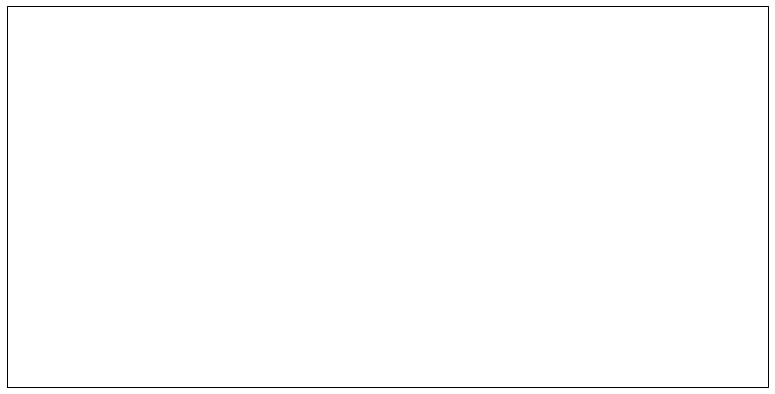

In [4]:
collection20 = ee.ImageCollection('ECMWF/CAMS/NRT').select('particulate_matter_d_less_than_25_um_surface').filterDate('2020-03-13', '2020-04-13').mean()


srtm = ee.Image("CGIAR/SRTM90_V4")
# specify visualization parameters and region to map
visualization = {'min':0,'max':0.000076,'bands':'particulate_matter_d_less_than_25_um_surface'}
bbox = [-180,-90,180,90]

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())
cee.addLayer(collection20,ax=ax, cmap=plt.cm.terrain,visParams=visualization,dims=2000)

# # plot the map
# #ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization,dims=4000)
# # add a color bar using cartoee
# #cb = cee.addColorbar(ax,loc='right',cmap=matplotlib.colors.Colormap('terrain'),visParams=visualization)
cb = cee.addColorbar(ax,loc='right',cmap=plt.cm.terrain,visParams=visualization)

ax.coastlines()

# # set gridlines and spacing
xticks = [-180,-120,-60,0,60,120,180]
yticks = [-90,-60,-30,0,30,60,90]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# # set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set tick labels
ax.set_xticks([-180,-120,-60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

# plt.savefig('test.png')